This example aims to have two target orbits, and one observer orbit. The observer is tasked with monitoring the two targets to minimize the trace covariance of the state over the simulation horizon. We use a PPO agent that is rewarded for minimizing the trace covariance of the target states to the best of its ability.

In [1]:
%matplotlib widget
import sys
sys.path.append("../src")

import numpy as np
import matplotlib.pyplot as plt

from SensorTasking.compute_coefficients import SSA_Problem

In [2]:
# L2 Halo orbit, period = 3.225 TU  (Target orbit)
x0_1 = np.array([
        1.1540242813087864,
        0.0,
        -0.1384196144071876,
        4.06530060663289e-15,
        -0.21493019200956867,
        8.48098638414804e-15
    ])

# L1 lyapunov, period = 3.225 TU (target orbit)
x0_2 = np.array([
        0.8027692908754149,
        0.0,
        0.0,
        -1.1309830924549648e-14,
        0.33765564334938736,
        0.0
    ])


# 1:1 L2 Lyapunov, period = 6.45 TU (observer orbit)
x0_3 = np.array([
        0.9982702689023665,
        0.0,
        0.0,
        -2.5322340091977996e-14,
        1.5325475708886613,
        0.0
    ])

# 1:1 L1 Lyapunov, period = 6.45 TU (observer orbit)
x0_4 = np.array([
            0.65457084231188,
        0.0,
        0.0,
        3.887957091335523e-13,
        0.7413347560791179,
        0.0
])



In [3]:
prob = SSA_Problem(target_ics=[x0_1, x0_2], target_periods=[3.225, 3.225], agent_ics=[x0_3, x0_4], agent_periods=[6.45, 6.45])

In [4]:
phases = np.linspace(0, 1.0, 40)
sols = np.zeros_like(phases)

In [5]:
for i, phase in enumerate(phases):
    sols[i] = prob.fitness([phase, phase])

Restricted license - for non-production use only - expires 2025-11-24


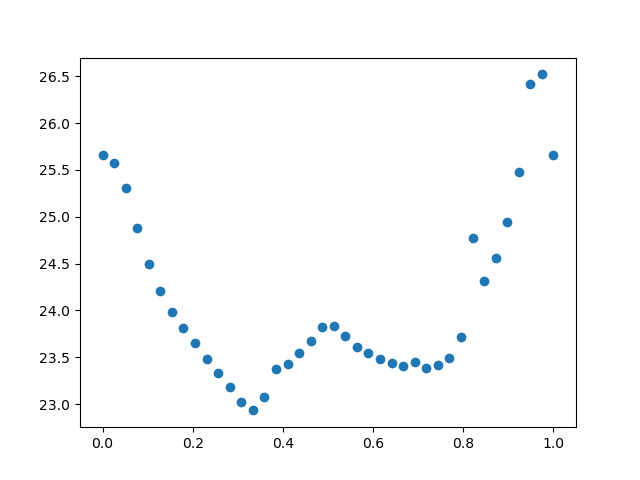

In [6]:
plt.clf()
plt.scatter(phases, np.log(sols))
plt.show()

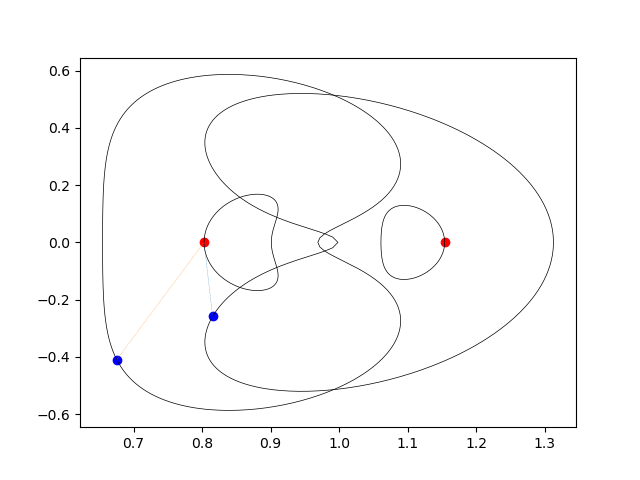

In [8]:
ani= prob.render([0.9, 0.9])